In [3]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette("viridis")
import math

In [5]:
df = pd.read_parquet(r'../MyFitnessPal_Clustering/mfp_cleaned_final.parquet')
df.head()

,ID,Date,Calories_goal,Calories_total,Carbs_goal,Carbs_total,Fat_goal,Fat_total,Fiber_goal,Fiber_total,Meals,Num_Meals,Protein_goal,Protein_total,Sodium_goal,Sodium_total,Sugar_goal,Sugar_total
0,1,2014-09-14,3173.0,2924.0,396.0,340.0,105.0,114.0,NaN,NaN,MY food,1,160.0,186.0,2300.0,3658.0,119.0,109.0
1,1,2014-09-15,1572.0,2430.0,196.0,96.0,52.0,37.0,NaN,NaN,MY food,1,79.0,50.0,2300.0,855.0,59.0,63.0
2,1,2014-09-16,1832.0,1862.0,229.0,158.0,61.0,54.0,NaN,NaN,MY food,1,92.0,114.0,2300.0,2215.0,69.0,100.0
3,1,2014-09-17,1685.0,2251.0,210.0,187.0,56.0,60.0,NaN,NaN,MY food,1,85.0,98.0,2300.0,1765.0,63.0,105.0
4,1,2014-09-18,1597.0,2001.0,199.0,113.0,53.0,81.0,NaN,NaN,MY food,1,80.0,202.0,2300.0,1101.0,60.0,71.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 586956 entries, 0 to 587186
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   ID              586956 non-null  int64         
 1   Date            586956 non-null  datetime64[ns]
 2   Calories_goal   586949 non-null  float64       
 3   Calories_total  586930 non-null  float64       
 4   Carbs_goal      572815 non-null  float64       
 5   Carbs_total     572814 non-null  float64       
 6   Fat_goal        569103 non-null  float64       
 7   Fat_total       569096 non-null  float64       
 8   Fiber_goal      242758 non-null  float64       
 9   Fiber_total     242756 non-null  float64       
 10  Meals           586956 non-null  object        
 11  Num_Meals       586956 non-null  int64         
 12  Protein_goal    579636 non-null  float64       
 13  Protein_total   579626 non-null  float64       
 14  Sodium_goal     390329 non-null  float64 

In [9]:
df.describe()

,ID,Date,Calories_goal,Calories_total,Carbs_goal,Carbs_total,Fat_goal,Fat_total,Fiber_goal,Fiber_total,Num_Meals,Protein_goal,Protein_total,Sodium_goal,Sodium_total,Sugar_goal,Sugar_total
count,586956.000000,586956,586949.000000,586930.000000,572815.000000,572814.000000,569103.000000,569096.000000,242758.000000,242756.000000,586956.000000,579636.000000,579626.000000,390329.000000,390328.000000,368754.000000,368756.000000
mean,4946.858792,2015-01-02 01:04:56.240263168,1804.412421,1413.581384,194.374802,145.187588,62.635983,53.537535,30.274170,17.802102,3.531996,115.153805,74.370977,2302.435661,1933.886255,64.209267,49.719270
min,1.000000,2014-09-14 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2513.000000,2014-11-17 00:00:00,1450.000000,1038.000000,150.000000,85.000000,47.000000,31.000000,25.000000,8.000000,3.000000,77.000000,43.000000,2300.000000,1018.000000,49.000000,22.000000
50%,4927.000000,2015-01-10 00:00:00,1702.000000,1403.000000,189.000000,142.000000,57.000000,50.000000,27.000000,16.000000,4.000000,102.000000,69.000000,2300.000000,1793.000000,61.000000,43.000000
75%,7427.000000,2015-02-15 00:00:00,2041.000000,1765.000000,236.000000,195.000000,71.000000,70.000000,34.000000,25.000000,4.000000,140.000000,98.000000,2300.000000,2637.000000,75.000000,69.000000
max,9897.000000,2015-04-09 00:00:00,13539.000000,14960.000000,1690.000000,3818.000000,645.000000,1185.000000,152.000000,198.000000,6.000000,975.000000,1006.000000,3500.000000,19804.000000,720.000000,926.000000
std,2844.673476,NaN,526.171977,663.492198,81.877706,85.695243,25.959362,34.359028,9.415722,13.072067,1.294449,53.145726,46.098720,142.612412,1279.356009,23.555992,38.477448


In [11]:
df.isnull().sum()

ID                     0
Date                   0
Calories_goal          7
Calories_total        26
Carbs_goal         14141
Carbs_total        14142
Fat_goal           17853
Fat_total          17860
Fiber_goal        344198
Fiber_total       344200
Meals                  0
Num_Meals              0
Protein_goal        7320
Protein_total       7330
Sodium_goal       196627
Sodium_total      196628
Sugar_goal        218202
Sugar_total       218200
dtype: int64

In [13]:
for nutrient in ['Calories', 'Carbs', 'Fat', 'Protein', 'Fiber', 'Sodium', 'Sugar']:
     df[f'{nutrient}_diff'] = df[f'{nutrient}_total'] - df[f'{nutrient}_goal']

In [15]:
df = df.drop(columns=['Meals', 'Calories_goal', 'Carbs_goal', 'Fat_goal', 'Protein_goal', 'Fiber_goal', 'Sodium_goal', 'Sugar_goal'])

In [17]:
df.shape

(586956, 17)

In [19]:
df.columns

Index(['ID', 'Date', 'Calories_total', 'Carbs_total', 'Fat_total',
       'Fiber_total', 'Num_Meals', 'Protein_total', 'Sodium_total',
       'Sugar_total', 'Calories_diff', 'Carbs_diff', 'Fat_diff',
       'Protein_diff', 'Fiber_diff', 'Sodium_diff', 'Sugar_diff'],
      dtype='object')

In [21]:
agg_funcs = {
    'Date': ['min', 'max'],
    'Calories_total': ['median', 'std'],
    'Carbs_total': ['median', 'std'],
    'Fat_total': ['median', 'std'],
    'Protein_total': ['median', 'std'],
    'Fiber_total': ['median', 'std'],
    'Sodium_total': ['median', 'std'],
    'Sugar_total': ['median', 'std'],
    'Num_Meals': ['median', 'std'],
    'Calories_diff': ['median', 'std'],
    'Carbs_diff': ['median', 'std'],
    'Fat_diff': ['median', 'std'],
    'Protein_diff': ['median', 'std'],
    'Fiber_diff': ['median', 'std'],
    'Sodium_diff': ['median', 'std'],
    'Sugar_diff': ['median', 'std'],
    'ID': 'size'
}

In [23]:
df = df.groupby('ID').agg(agg_funcs)
df.columns = ['_'.join(col).strip() for col in df.columns.values]
df.head()

,Date_min,Date_max,Calories_total_median,Calories_total_std,Carbs_total_median,Carbs_total_std,Fat_total_median,Fat_total_std,Protein_total_median,Protein_total_std,...,Fat_diff_std,Protein_diff_median,Protein_diff_std,Fiber_diff_median,Fiber_diff_std,Sodium_diff_median,Sodium_diff_std,Sugar_diff_median,Sugar_diff_std,ID_size
ID,,,,,,,,,,,,,,,,,,,,,
1,2014-09-14,2015-03-12,2264.5,493.862004,186.5,77.583096,77.0,32.913218,132.5,51.942815,...,31.007163,22.5,48.029397,NaN,NaN,-249.0,940.908948,4.0,36.498948,174
2,2015-01-12,2015-03-12,1382.5,432.817500,175.5,49.955845,40.0,20.085488,42.5,11.711938,...,22.772245,-31.5,20.711797,NaN,NaN,-629.0,737.602624,17.5,26.003580,60
3,2014-09-14,2014-09-23,1628.0,402.164323,139.0,67.625017,41.0,25.268086,55.0,30.328362,...,21.930627,-19.0,25.016185,-15.0,13.909572,-712.0,804.615111,NaN,NaN,7
4,2014-10-21,2015-03-02,984.0,441.236230,111.0,52.433841,37.0,21.052911,39.0,25.993808,...,21.878517,-44.0,26.379112,NaN,NaN,-709.0,804.242433,NaN,NaN,27
5,2014-09-14,2015-03-11,2999.0,452.820340,NaN,NaN,73.0,33.418873,186.0,45.472437,...,34.353106,-11.0,50.904250,-6.0,8.456033,-421.0,846.549024,-9.0,48.206990,179


In [25]:
df = df.rename(columns={
    'Date_min': 'First_Date',
    'Date_max': 'Last_Date',
    'ID_size': 'NumInputs'
})

In [27]:
max_last_date = df["Last_Date"].max()

df["Registration_Time"] = (max_last_date - df["First_Date"]).dt.days
df["NumDaysSinceLastInput"] = (max_last_date - df["Last_Date"]).dt.days
df["Tracking_Duration_Days"] = ((df["Last_Date"] - df["First_Date"]).dt.days) + 1
df["Logging_Frequency"] = df["NumInputs"] / df["Tracking_Duration_Days"]

In [33]:
df.head(1)

,First_Date,Last_Date,Calories_total_median,Calories_total_std,Carbs_total_median,Carbs_total_std,Fat_total_median,Fat_total_std,Protein_total_median,Protein_total_std,...,Fiber_diff_std,Sodium_diff_median,Sodium_diff_std,Sugar_diff_median,Sugar_diff_std,NumInputs,Registration_Time,NumDaysSinceLastInput,Tracking_Duration_Days,Logging_Frequency
ID,,,,,,,,,,,,,,,,,,,,,
1,2014-09-14,2015-03-12,2264.5,493.862004,186.5,77.583096,77.0,32.913218,132.5,51.942815,...,NaN,-249.0,940.908948,4.0,36.498948,174,207,28,180,0.966667


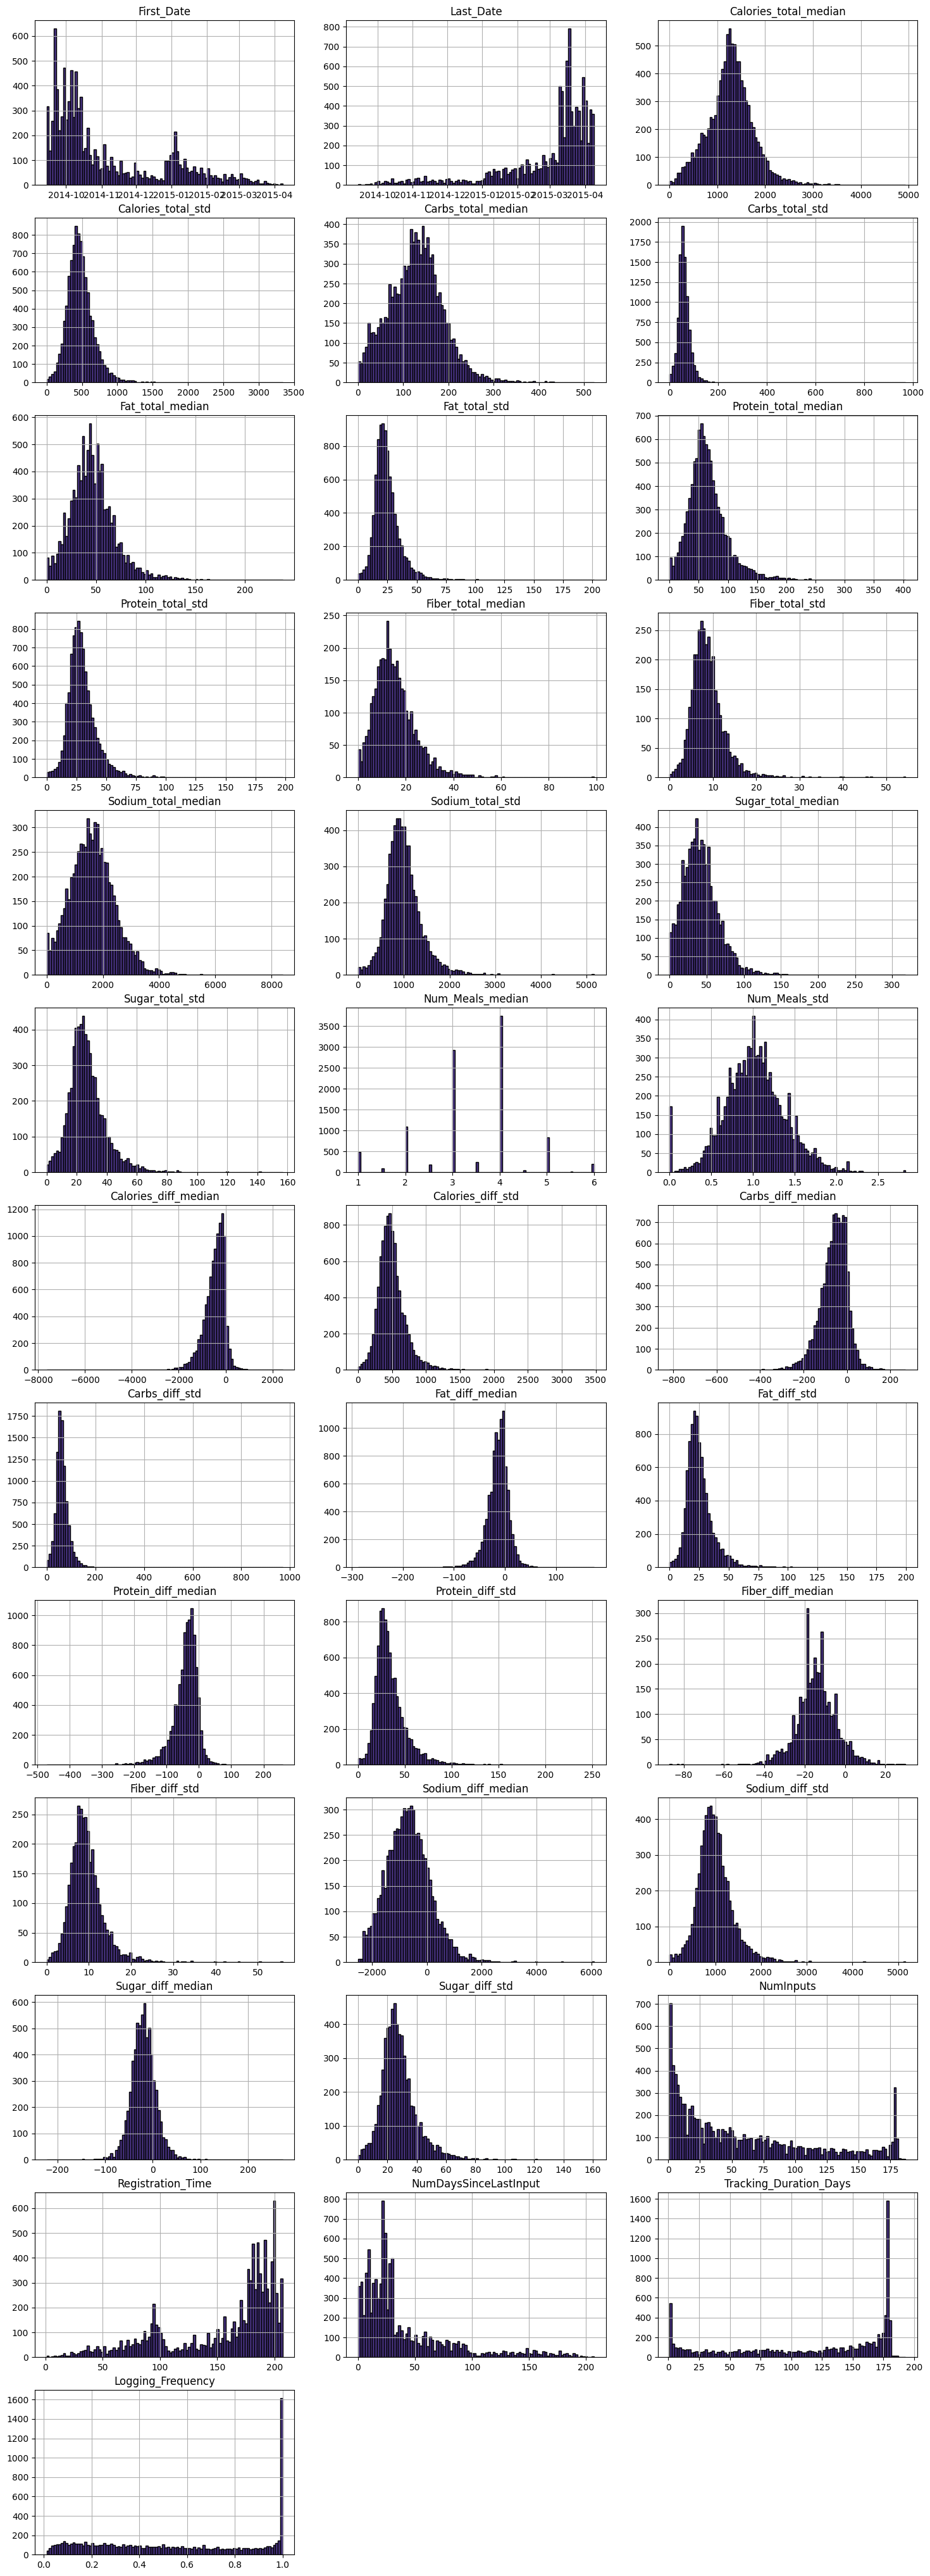

In [39]:
numeric_cols = df.select_dtypes(include=["number", "datetime"]).columns.drop("ID", errors="ignore")

num_cols = len(numeric_cols)
cols = 3
rows = math.ceil(num_cols / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    df[col].hist(ax=axes[i], bins=100, edgecolor="black")
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

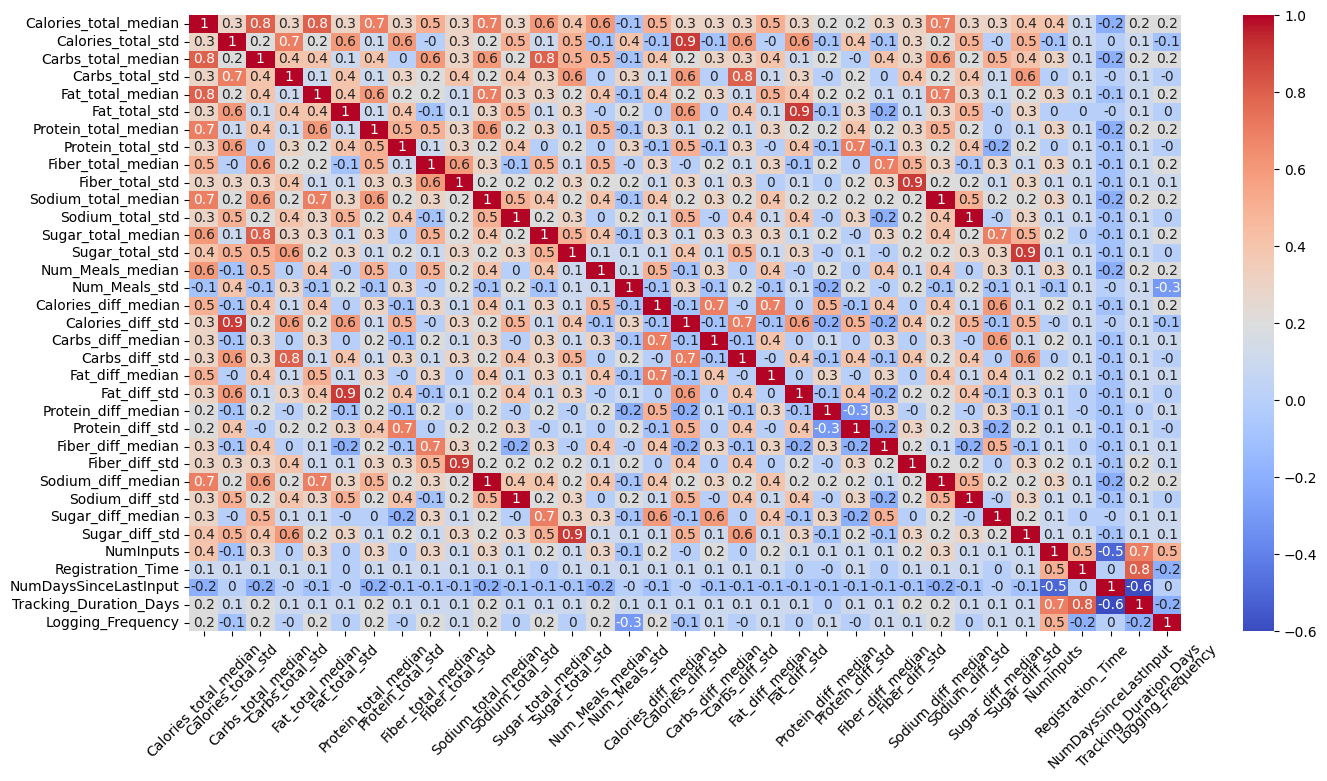

In [41]:
corr_matrix = df.drop(columns=["First_Date", "Last_Date"]).corr().round(1)
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=45)
plt.show()

In [79]:
df.drop(columns=['First_Date', 'Last_Date'], inplace=True)
df.columns

Index(['Calories_total_median', 'Calories_total_std', 'Carbs_total_median',
       'Carbs_total_std', 'Fat_total_median', 'Fat_total_std',
       'Protein_total_median', 'Protein_total_std', 'Fiber_total_median',
       'Fiber_total_std', 'Sodium_total_median', 'Sodium_total_std',
       'Sugar_total_median', 'Sugar_total_std', 'Num_Meals_median',
       'Num_Meals_std', 'Calories_diff_median', 'Calories_diff_std',
       'Carbs_diff_median', 'Carbs_diff_std', 'Fat_diff_median',
       'Fat_diff_std', 'Protein_diff_median', 'Protein_diff_std',
       'Fiber_diff_median', 'Fiber_diff_std', 'Sodium_diff_median',
       'Sodium_diff_std', 'Sugar_diff_median', 'Sugar_diff_std', 'NumInputs',
       'Registration_Time', 'NumDaysSinceLastInput', 'Tracking_Duration_Days',
       'Logging_Frequency'],
      dtype='object')

In [80]:
features_to_cluster = [
    # 'First_Date',
    # 'Last_Date',
    'Calories_total_median',
    'Carbs_total_median',
    'Fat_total_median',
    'Protein_total_median',
    'Fiber_total_median',
    'Sodium_total_median',
    'Sugar_total_median',
    'Num_Meals_median',

    'Calories_total_std',
    'Carbs_total_std',
    'Fat_total_std',
    'Protein_total_std',
    'Fiber_total_std',
    'Sodium_total_std',
    'Sugar_total_std',
    'Num_Meals_std',

    'Calories_diff_median',
    'Carbs_diff_median',
    'Fat_diff_median',
    'Protein_diff_median',
    'Fiber_diff_median',
    'Sodium_diff_median',
    'Sugar_diff_median',

    'Calories_diff_std',
    'Carbs_diff_std',
    'Fat_diff_std',
    'Protein_diff_std',
    'Fiber_diff_std',
    'Sodium_diff_std',
    'Sugar_diff_std',

    'NumInputs',
    #'Registration_Time',
    'NumDaysSinceLastInput',
    #'Tracking_Duration_Days',
    #'Logging_Frequency'
]

In [81]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

df_cluster = df[features_to_cluster].copy()

# --- Scaling ---
scaler = StandardScaler()
df_scaled_array = scaler.fit_transform(df_cluster)
df_scaled = pd.DataFrame(df_scaled_array, columns=df_cluster.columns, index=df_cluster.index)

# --- Imputation ---
n_neighbors_impute = 5
imputer = KNNImputer(n_neighbors=n_neighbors_impute)
df_imputed_scaled_array = imputer.fit_transform(df_scaled)
df_imputed_scaled = pd.DataFrame(df_imputed_scaled_array, columns=df_cluster.columns, index=df_cluster.index)

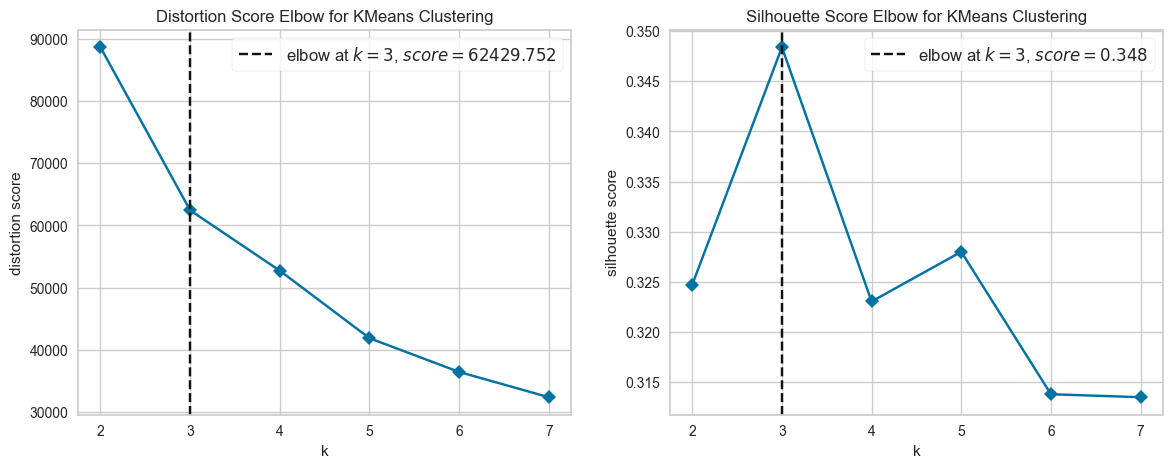

In [82]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_imputed_scaled)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow (Inertia)
model_inertia = KMeans(random_state=42, n_init='auto')
visualizer_inertia = KElbowVisualizer(model_inertia, k=(2, 8), metric='distortion', timings=False, ax=axes[0])
visualizer_inertia.fit(X_pca)
visualizer_inertia.finalize()

# Elbow (Silhouette)
model_silhouette = KMeans(random_state=42, n_init='auto')
visualizer_silhouette = KElbowVisualizer(model_silhouette, k=(2, 8), metric='silhouette', timings=False, ax=axes[1])
visualizer_silhouette.fit(X_pca)
visualizer_silhouette.finalize()

plt.show()

In [83]:
# Applying K-Means with Optimal K
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans_final.fit(X_pca)

# cluster labels
cluster_labels = kmeans_final.labels_
df_results = df.copy()
df_results['Cluster'] = cluster_labels

print(df_results['Cluster'].value_counts().sort_index())

Cluster
0    2133
1    3215
2    1490
3    2338
4     718
Name: count, dtype: int64


In [84]:
df_results["Cluster"] = df_results['Cluster'].map({0: 1, 1: 2, 2: 3, 3: 4, 4: 5})

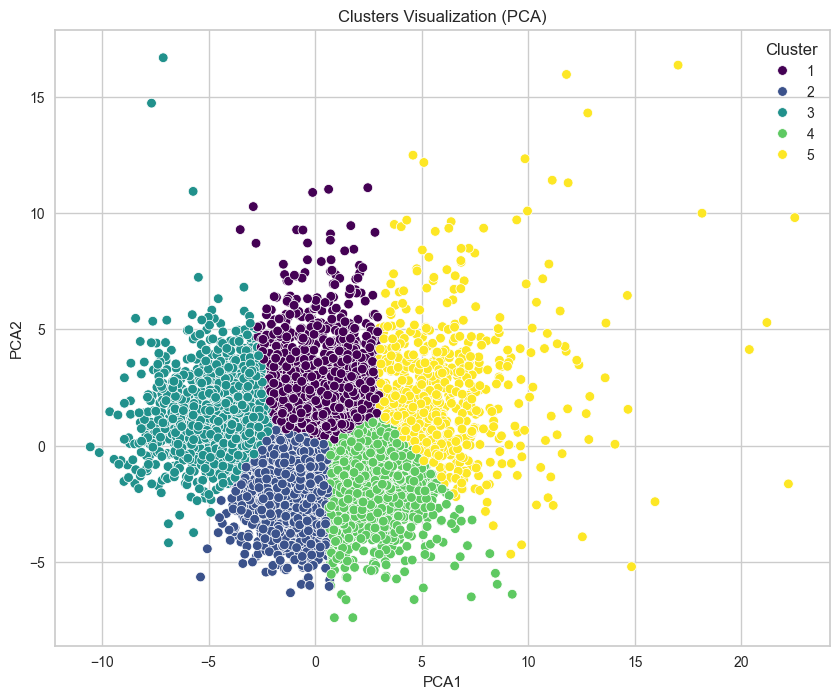

In [85]:
from sklearn.decomposition import PCA
import seaborn as sns

df_results['PCA1'] = X_pca[:, 0]
df_results['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_results, x='PCA1', y='PCA2', hue='Cluster', palette='viridis') 
plt.title('Clusters Visualization (PCA)')
plt.show()

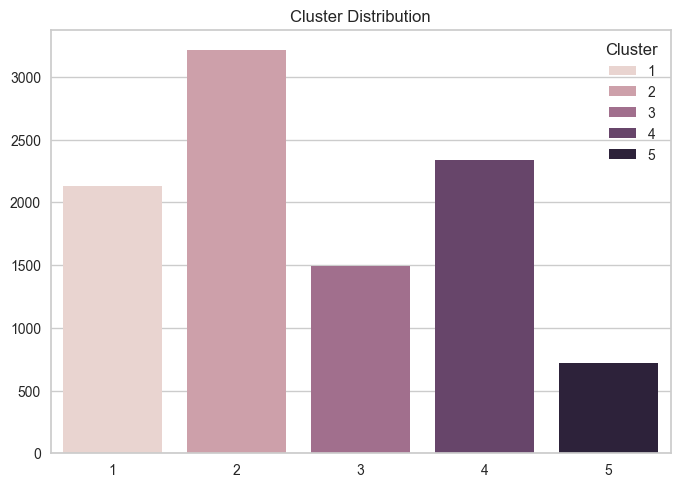

In [86]:
sns.countplot(data=df_results, x='Cluster', hue='Cluster')
plt.xlabel('')
plt.ylabel('')
plt.title('Cluster Distribution')
plt.show()

In [87]:
df_results.columns

Index(['Calories_total_median', 'Calories_total_std', 'Carbs_total_median',
       'Carbs_total_std', 'Fat_total_median', 'Fat_total_std',
       'Protein_total_median', 'Protein_total_std', 'Fiber_total_median',
       'Fiber_total_std', 'Sodium_total_median', 'Sodium_total_std',
       'Sugar_total_median', 'Sugar_total_std', 'Num_Meals_median',
       'Num_Meals_std', 'Calories_diff_median', 'Calories_diff_std',
       'Carbs_diff_median', 'Carbs_diff_std', 'Fat_diff_median',
       'Fat_diff_std', 'Protein_diff_median', 'Protein_diff_std',
       'Fiber_diff_median', 'Fiber_diff_std', 'Sodium_diff_median',
       'Sodium_diff_std', 'Sugar_diff_median', 'Sugar_diff_std', 'NumInputs',
       'Registration_Time', 'NumDaysSinceLastInput', 'Tracking_Duration_Days',
       'Logging_Frequency', 'Cluster', 'PCA1', 'PCA2'],
      dtype='object')

In [88]:
# Feature Groups

# Nutrient medians
nutrient_median_cols = ['Calories_total_median', 'Carbs_total_median', 'Fat_total_median', 'Protein_total_median',
                        'Fiber_total_median', 'Sodium_total_median', 'Sugar_total_median']

# Nutrient variability
nutrient_std_cols = ['Calories_total_std', 'Carbs_total_std', 'Fat_total_std', 'Protein_total_std',
                     'Fiber_total_std', 'Sodium_total_std', 'Sugar_total_std']

# Tracking behavior metrics
tracking_cols = ['NumInputs', 'Tracking_Duration_Days', 'Logging_Frequency',
                 'Num_Meals_median', 'NumDaysSinceLastInput']

# Deviation medians
diff_median_cols = ['Calories_diff_median', 'Carbs_diff_median', 'Fat_diff_median', 'Protein_diff_median',
                    'Fiber_diff_median', 'Sodium_diff_median', 'Sugar_diff_median']

# Deviation variability
diff_std_cols = ['Calories_diff_std', 'Carbs_diff_std', 'Fat_diff_std', 'Protein_diff_std',
                 'Fiber_diff_std', 'Sodium_diff_std', 'Sugar_diff_std']

all_feature_groups = {
    "Nutrient Medians": nutrient_median_cols,
    "Nutrient Variability": nutrient_std_cols,
    "Tracking Behavior": tracking_cols,
    "Deviation Medians": diff_median_cols,
    "Deviation Variability": diff_std_cols
}

In [89]:
cluster_col = 'Cluster'
n_clusters = df_results[cluster_col].nunique()
cluster_labels = sorted(df_results[cluster_col].unique())
palette = sns.color_palette("viridis", n_clusters)


-- Analyzing: Nutrient Medians --


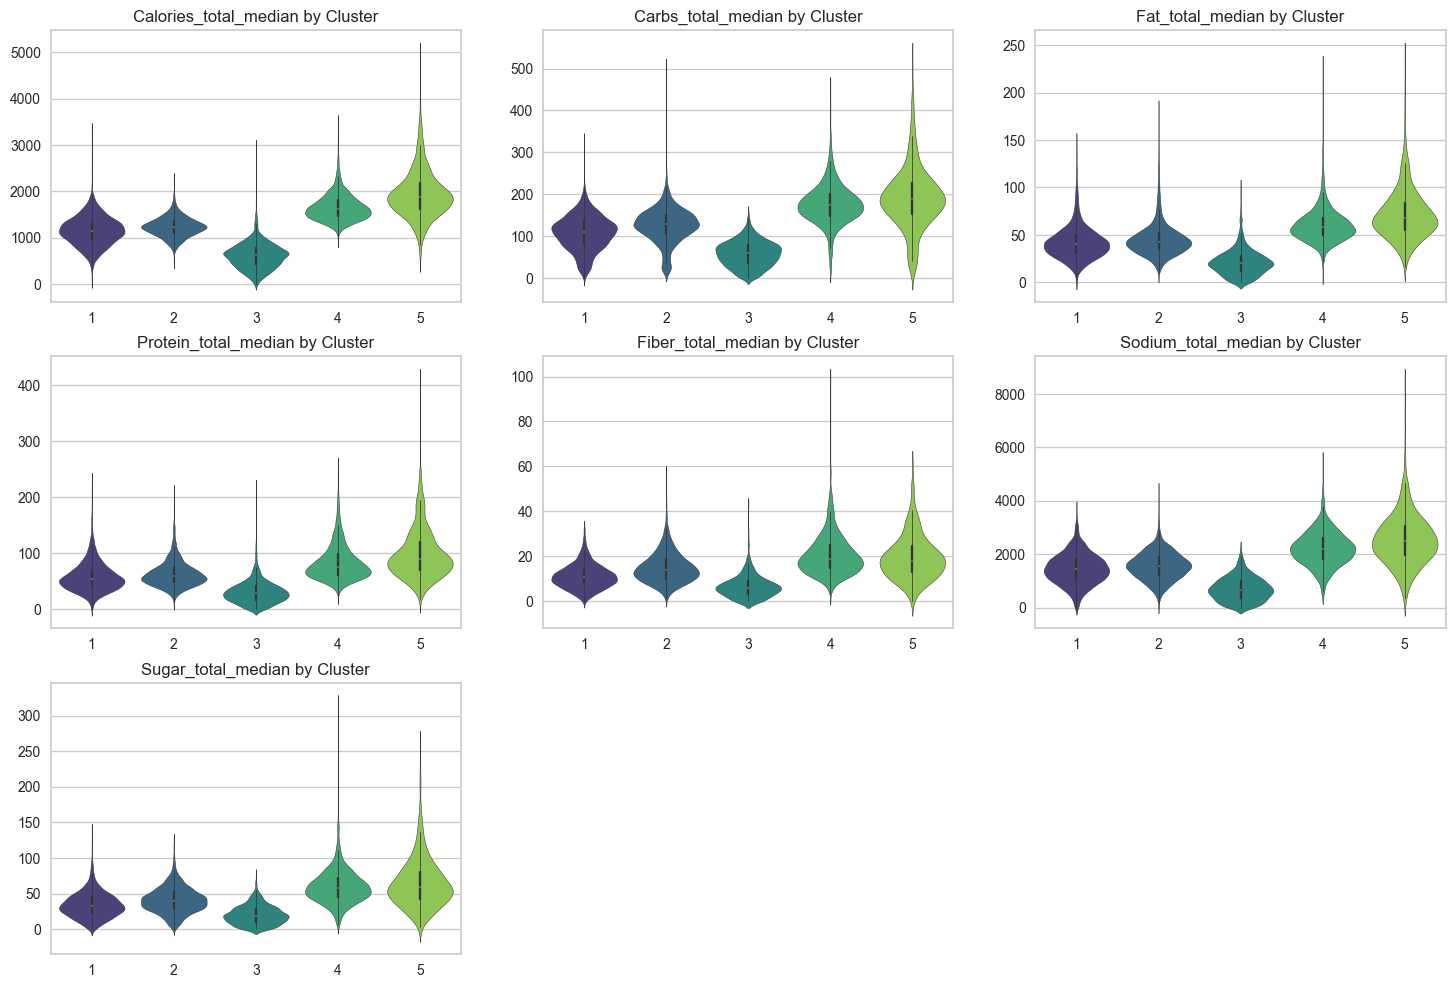


-- Analyzing: Nutrient Variability --


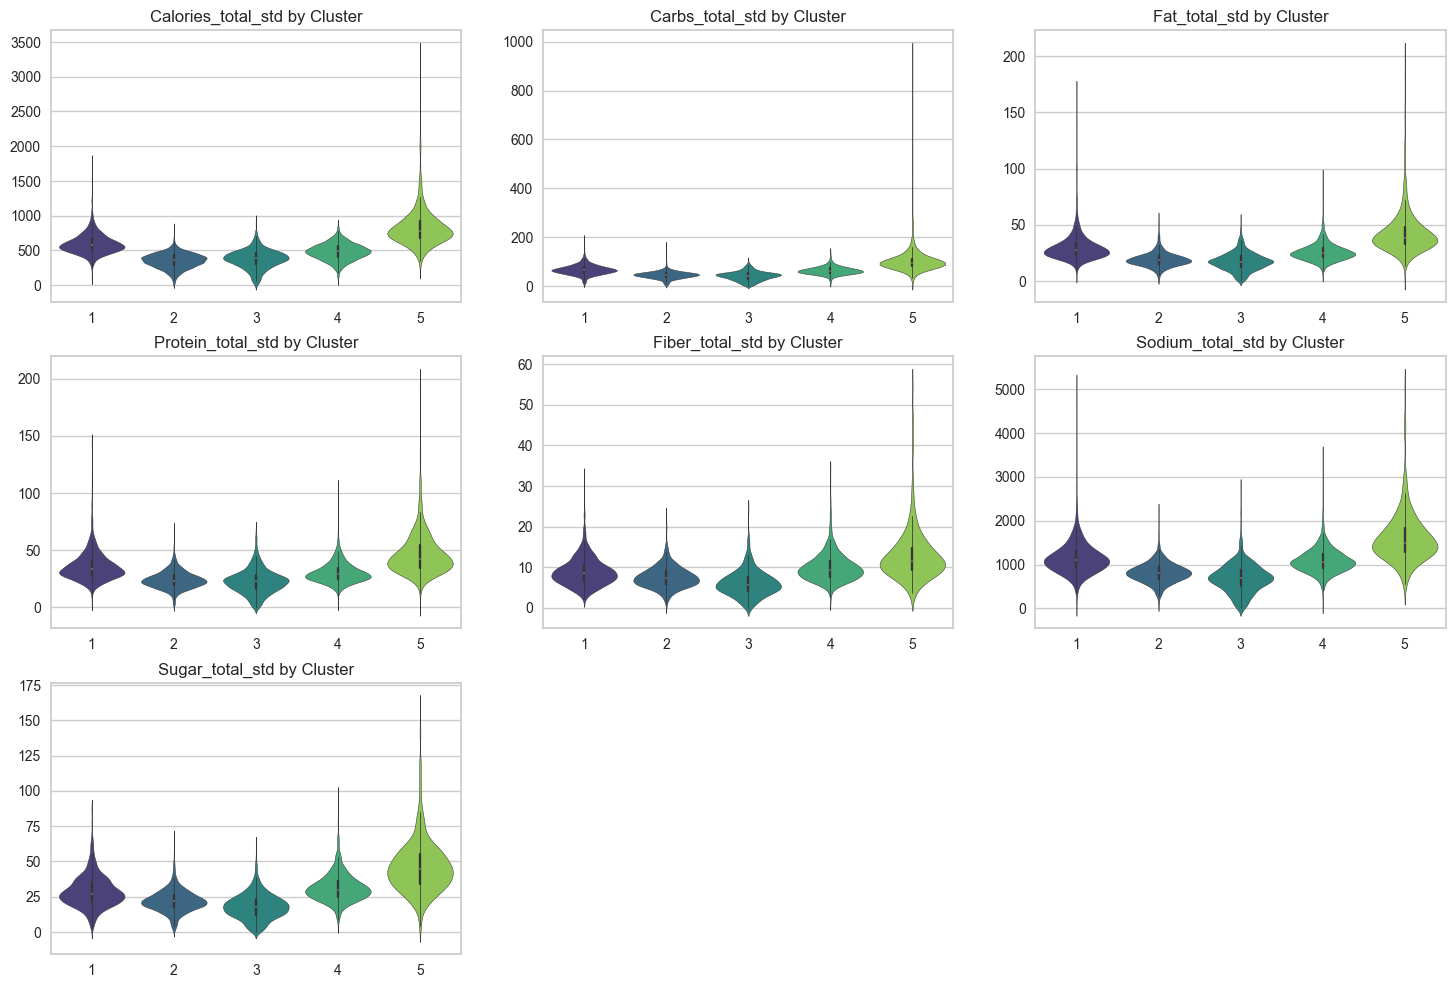


-- Analyzing: Tracking Behavior --


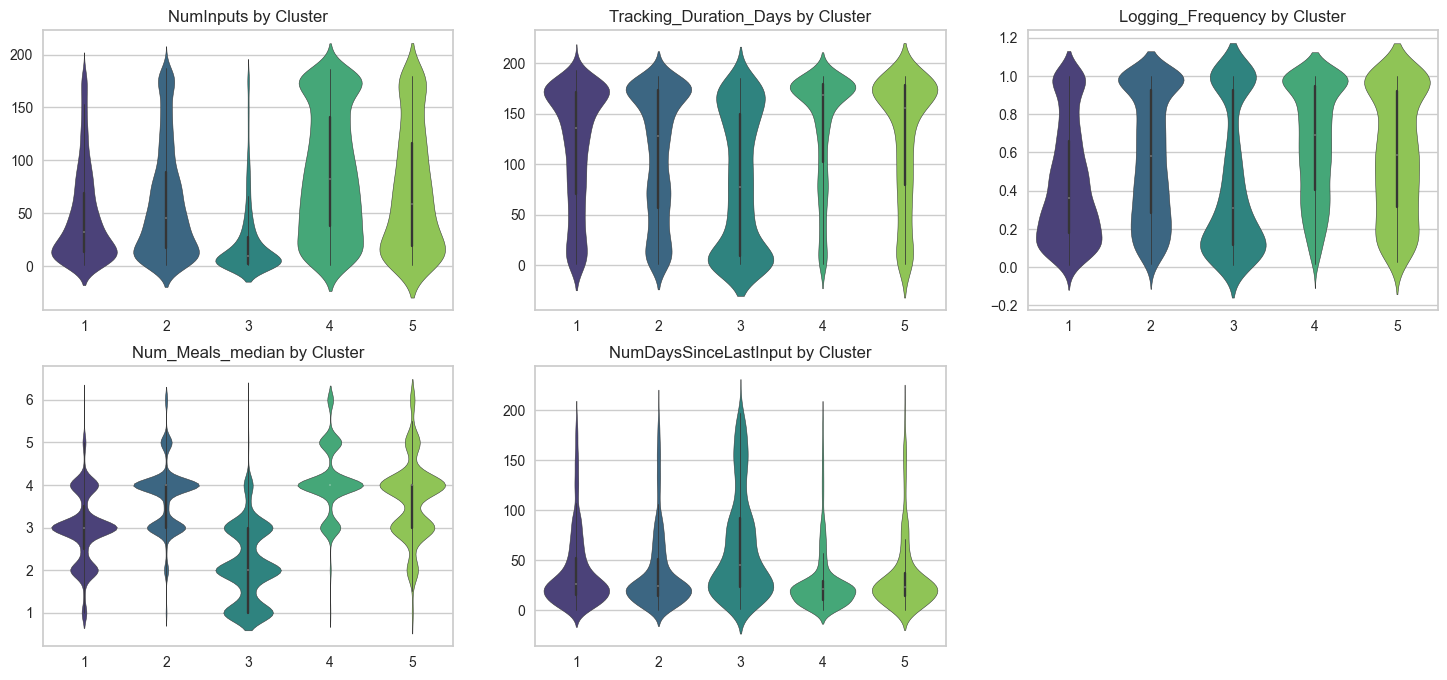


-- Analyzing: Deviation Medians --


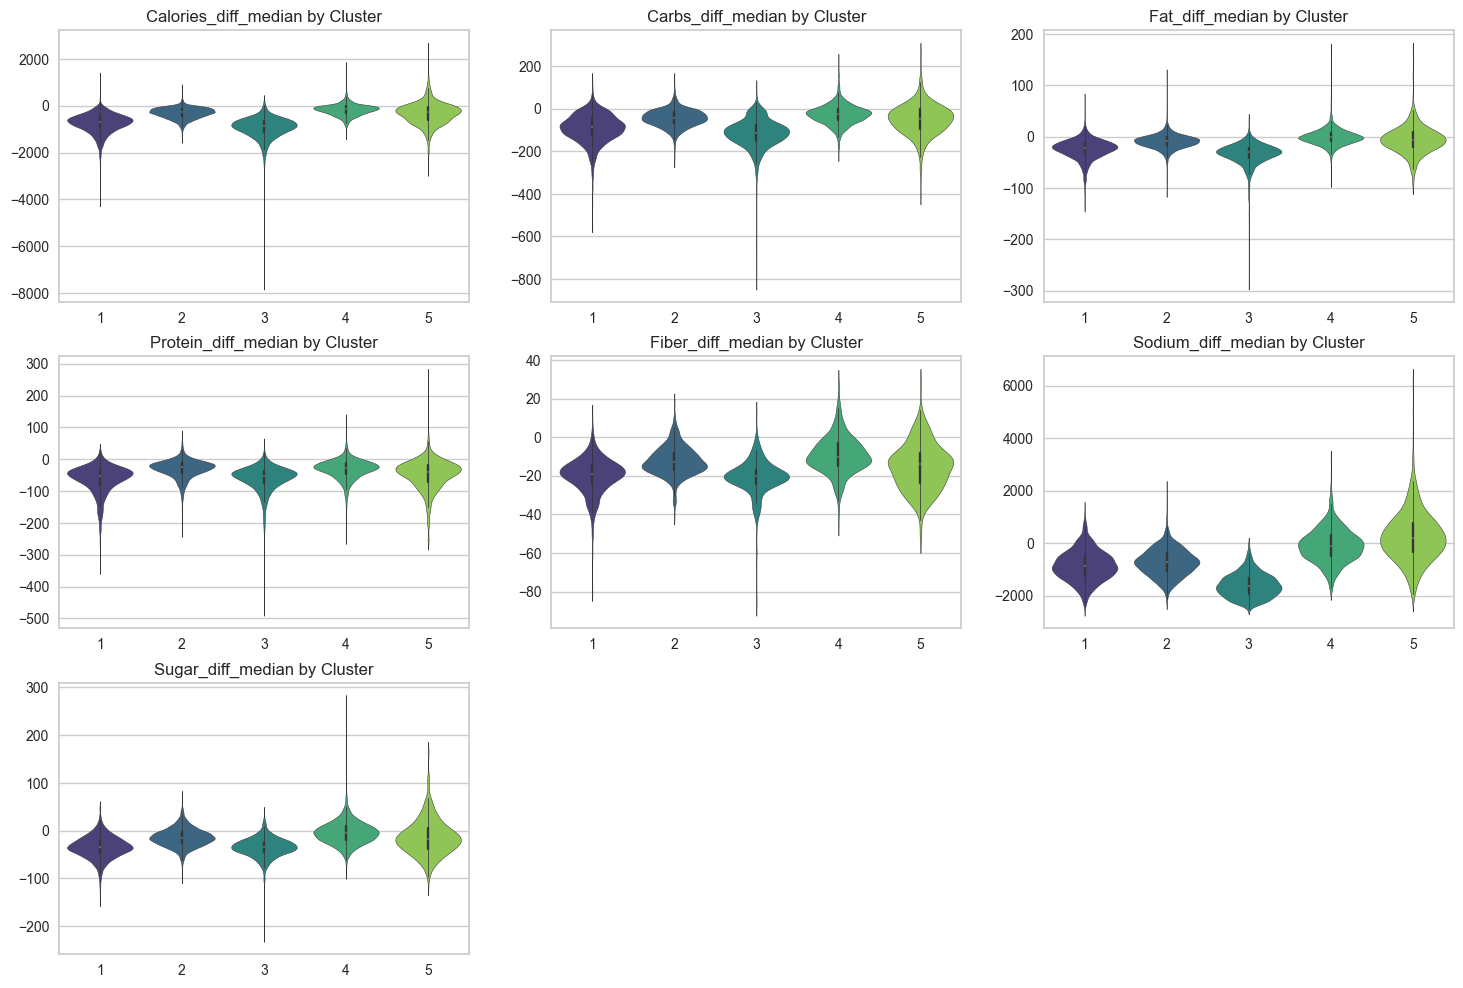


-- Analyzing: Deviation Variability --


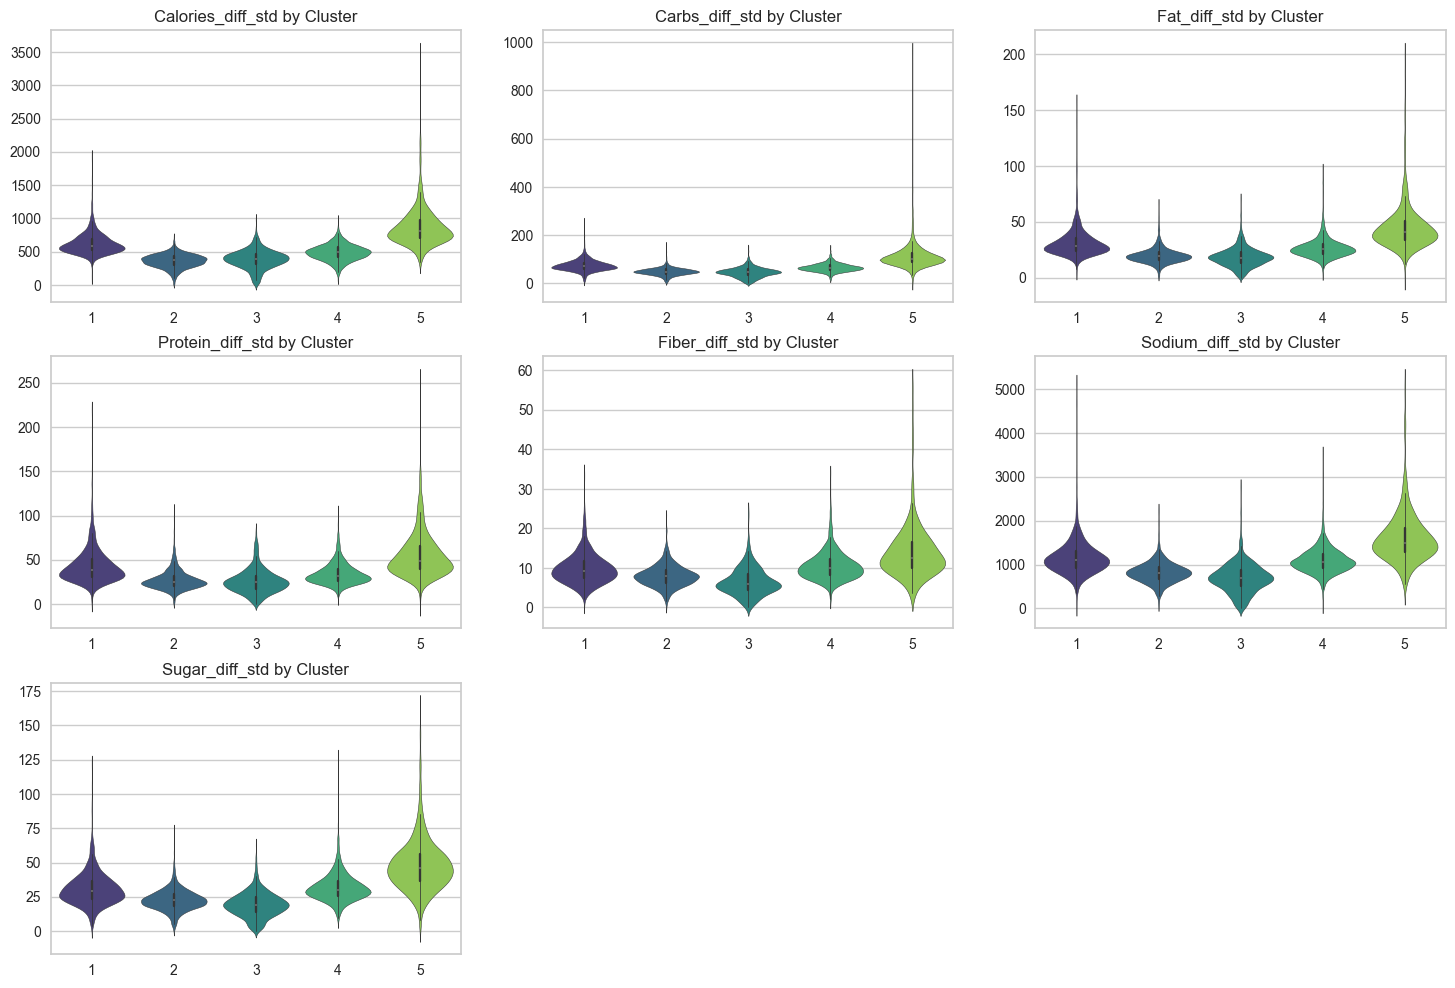

In [90]:
# Feature Distribution Comparison

for group_name, feature_list in all_feature_groups.items():
    print(f"\n-- Analyzing: {group_name} --")
    num_features = len(feature_list)
    ncols = min(3, num_features)
    nrows = (num_features + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 6, nrows * 4), squeeze=False)
    axes = axes.flatten()

    for i, feature in enumerate(feature_list):
        if i < len(axes):
          sns.violinplot(x=cluster_col, y=feature, data=df_results, order=cluster_labels, hue=cluster_col, palette=palette, legend=False, ax=axes[i])
          axes[i].set_title(f'{feature} by Cluster')
          axes[i].set_xlabel('')
          axes[i].set_ylabel('')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.show()


-- Heatmap for: Nutrient Medians --


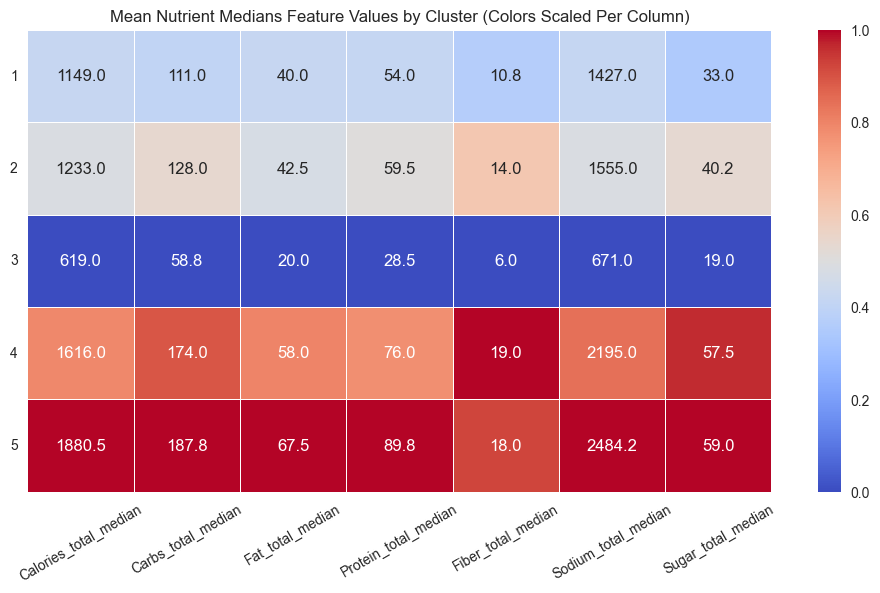


-- Heatmap for: Nutrient Variability --


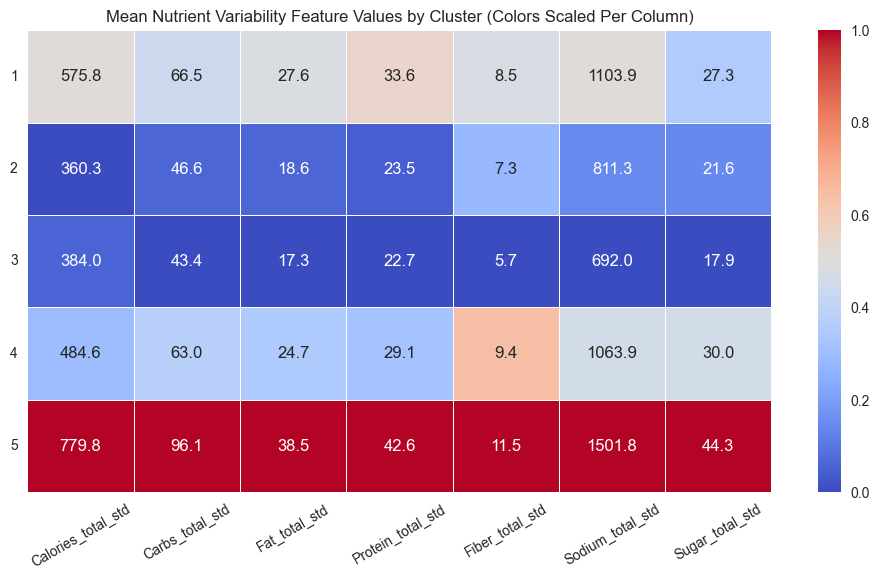


-- Heatmap for: Tracking Behavior --


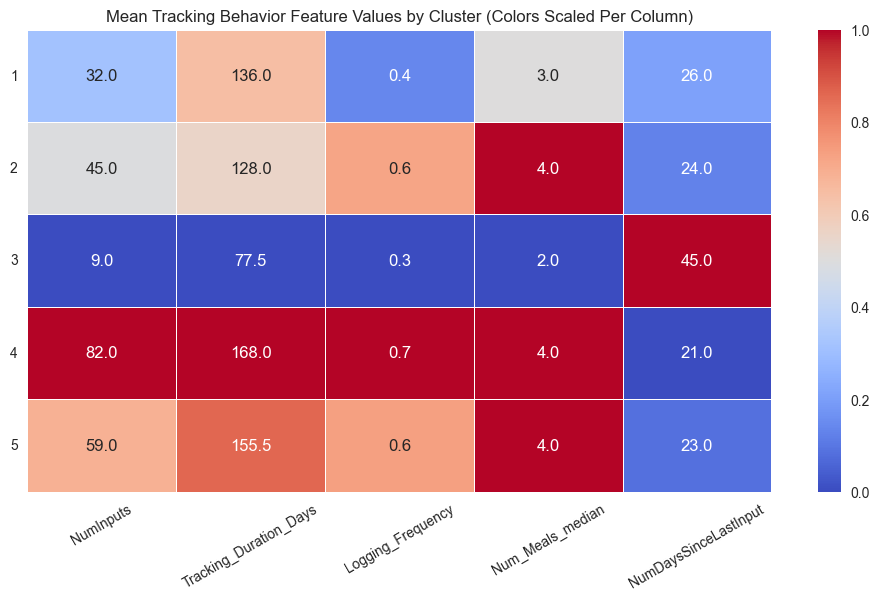


-- Heatmap for: Deviation Medians --


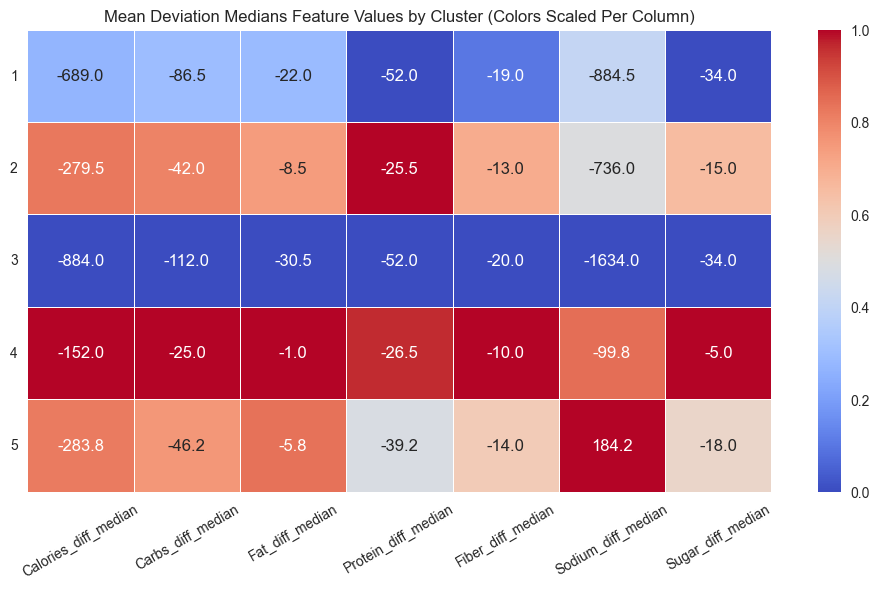


-- Heatmap for: Deviation Variability --


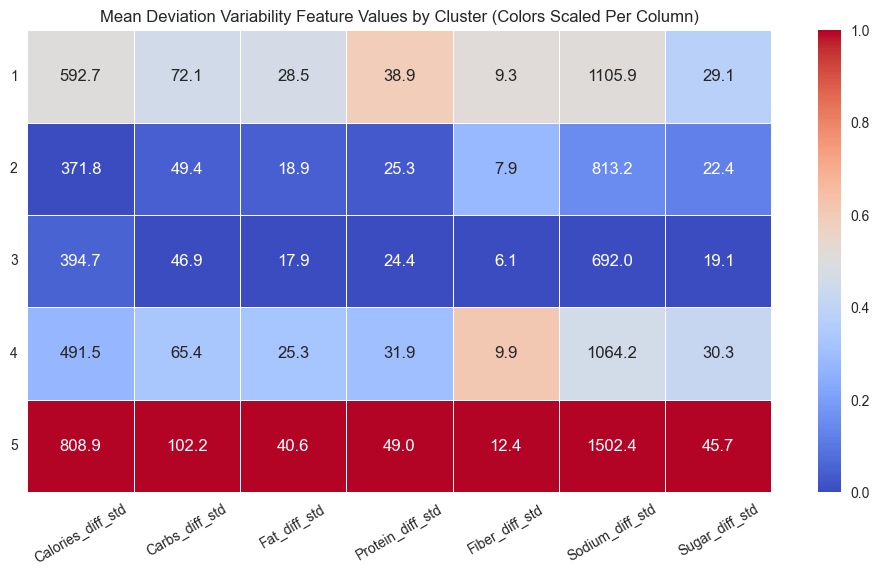

In [91]:
from sklearn.preprocessing import MinMaxScaler

all_features = sum(all_feature_groups.values(), []) 
cluster_profile = df_results.groupby(cluster_col)[all_features].median()

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(cluster_profile)
normalized_cluster_profile = pd.DataFrame(normalized_data, index=cluster_profile.index, columns=cluster_profile.columns)

for group_name, feature_list in all_feature_groups.items():
    print(f"\n-- Heatmap for: {group_name} --")

    group_norm = normalized_cluster_profile[feature_list]
    group_orig = cluster_profile[feature_list]

    fig_width = max(12, len(feature_list) * 1.2)
    plt.figure(figsize=(fig_width, 6))

    sns.heatmap(group_norm, annot=group_orig, fmt=".1f", cmap="coolwarm", linewidths=.5)

    plt.title(f'Mean {group_name} Feature Values by Cluster (Colors Scaled Per Column)')
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=30)
    plt.yticks(rotation=0)
    plt.show()

In [112]:
all_features = df_results.columns.tolist()
all_features.remove('Cluster')

# Mean and std of each feature across clusters
cluster_means = df_results.groupby(cluster_col)[all_features].mean()
cluster_stds = cluster_means.std()
cluster_feature_means = cluster_means.mean()

# Coefficient of Variation (CV) = std / mean
feature_cv_across_clusters = cluster_stds / cluster_feature_means

# Sort by highest CV
important_features = feature_cv_across_clusters.sort_values(ascending=False)

# Display top N
top_n = 5
print(f"\nTop {top_n} most distinguishing features across clusters (by CV):")
print(important_features.head(7))
print(important_features.tail(top_n))


Top 5 most distinguishing features across clusters (by CV):
PCA1                   6.518680
PCA2                   3.409224
NumInputs              0.429126
Sodium_total_median    0.423013
Sugar_total_median     0.415238
Carbs_total_median     0.406542
Fat_total_median       0.401576
dtype: float64
Carbs_diff_median      -0.563860
Calories_diff_median   -0.661130
Sugar_diff_median      -0.679186
Fat_diff_median        -0.929720
Sodium_diff_median     -1.198060
dtype: float64


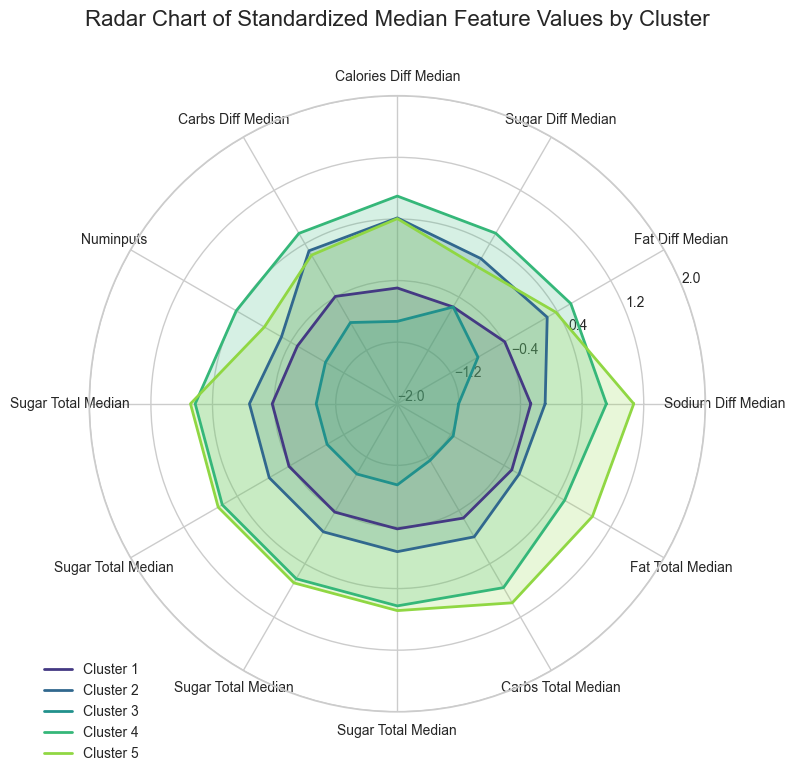

In [114]:
from math import pi
from sklearn.preprocessing import StandardScaler

radar_features = ['Sodium_diff_median', 'Fat_diff_median', 'Sugar_diff_median', 'Calories_diff_median', 'Carbs_diff_median',
                  'NumInputs', 'Sugar_total_median', 'Sugar_total_median', 'Carbs_total_median', 'Fat_total_median']

scaler = StandardScaler()

radar_data_scaled = df_results[[cluster_col] + radar_features].copy()
radar_data_scaled[radar_features] = scaler.fit_transform(radar_data_scaled[radar_features])

radar_profile = radar_data_scaled.groupby(cluster_col)[radar_features].median()
categories = list(radar_profile)
N = len(categories)

# --- Plotting Adjustments ---
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

min_val = radar_profile.min().min() #
max_val = radar_profile.max().max() 

y_min = np.floor(min_val - 0.5) # Use floor/ceil and add padding
y_max = np.ceil(max_val + 0.5)

num_ticks = 6
yticks = np.linspace(y_min, y_max, num_ticks)

ax.set_yticks(yticks)
ax.set_ylim(y_min, y_max) 

# --- Set Axis Labels 
ax.set_xticks(angles[:-1])
ax.set_xticklabels([c.replace('_', ' ').replace(' total mean','').replace(' diff mean',' Diff').title() for c in categories]) # Adjusted title casing slightly

# Plot data for each cluster (No change needed here)
for i, cluster_id in enumerate(cluster_labels):
    values = radar_profile.loc[cluster_id].values.flatten().tolist()
    values += values[:1] # Close the loop
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {cluster_id}', color=palette[i])
    ax.fill(angles, values, color=palette[i], alpha=0.2)

# --- Adjust Title ---
plt.title('Radar Chart of Standardized Median Feature Values by Cluster', size=16, y=1.1) # Updated title
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

# Conclusion

## კლასტერი #1

*   **საკმაოდ პასიური** კლასტერია.
*   მე-4 ადგილზეა დღეების ლოგირების თვალსაზრისით.
*   საკმაოდ ჩამორჩება დასახულ მიზნებს.

## კლასტერი #2

*   **საკმაოდ აქტიური** კლასტერია.
*   გამოირჩევა დღეების ლოგირების მაღალი მაჩვენებლით.
*   ასევე მაღალია დღიურად საჭმელების ლოგირების რაოდენობა.
*   საკმაოდ ახლოა დღიურ მიზანთან.

## კლასტერი #3

*   **ყველაზე პასიური** კლასტერი:
    *   დაბალი მაჩვენებელი აქვს როგორც დღეების ლოგირების,
    *   ასევე დღიურად შეტანილი საჭმელების რაოდენობის თვალსაზრისით.
*   ყველაზე მეტად ჩამორჩება დასახულ მიზნებს.

## კლასტერი #4

*   **ყველაზე აქტიური** კლასტერი ლოგირების მედიანის მაჩვენებლით.
*   საკმაოდ მაღალი მაჩვენებელი ფიქსირდება სხვადასხვა ნუტრიენტების თვალსაზრისით.
*   ყველაზე ახლოს არის კალორიებისა და სხვადასხვა ნუტრიენტების დღიურ მიზანთან.
*   განსაკუთრებით ახლოს არის **Fat**-ის მიზანთან (მიზანსა და რეალურ შედეგს შორის სხვაობა ნულთან ახლოსაა).
*   ამ კლასტერს დღიურად საშუალოდ **4 საჭმელი** შეაქვს (ისევე როგორც მე-2 და მე-5 კლასტერებს).

## კლასტერი #5

*   გამოირჩევა იმით, რომ კალორიებში და სხვადასხვა ნუტრიენტებში საშუალოდ **ყველაზე მაღალი** მაჩვენებელი ფიქსირდება.
*   აქტიურობით **მეორე ადგილზეა** (მე-4 კლასტერის შემდეგ).
*   საშუალოდ **4 საჭმელის** ლოგირებას აკეთებს დღიურად.
*   ეს კლასტერი ერთადერთია, სადაც სოდიუმის მოხმარება მნიშვნელოვნად სცდება მიზანს, რაც საყურადღებო ამბავია